# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

Project aim is: determine which factors influence the price of a vehicle.

Step 1: Open the data file and study the general information

Step 2: Data preprocessing

Step 3: Make calculations and add them to the table

Step 4: Carry out exploratory data analysis

Step 5: Overall conclusion

## Open the data file and study the general information. 

First, let's import all the tools we will use in this project and read the data with the try and except methods.


In [6]:
pip install -U sidetable

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sidetable in /home/jovyan/.local/lib/python3.7/site-packages (0.9.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sidetable
import warnings
import datetime as dt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
try:
    data = pd.read_csv(r'C:\Users\Ron\Documents\vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

Let's learn the data and columns.

In [4]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We already see from the info() method that there are some missing values in some columns. So let's dive deeper and see the count and percentage of missing values in columns.

In [6]:
data.stb.missing()

,missing,total,percent
is_4wd,25953,51525,50.369723
paint_color,9267,51525,17.985444
odometer,7892,51525,15.316836
cylinders,5260,51525,10.208637
model_year,3619,51525,7.023775
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000


We see that we have some work with missing values, but let's focus on studying the columns at first glance.

In [7]:
data.stb.freq(['is_4wd'])

,is_4wd,count,percent,cumulative_count,cumulative_percent
0,1.0,25572,100.0,25572,100.0


Data['is_4wd'] (whether the vehicle has 4-wheel drive) has a 100% boolean value of True, but 50%  from the column is missing.

In [8]:
data.stb.freq(['paint_color'])

,paint_color,count,percent,cumulative_count,cumulative_percent
0,white,10029,23.732784,10029,23.732784
1,black,7692,18.202471,17721,41.935255
2,silver,6244,14.775900,23965,56.711155
3,grey,5037,11.919637,29002,68.630792
4,blue,4475,10.589711,33477,79.220503
5,red,4421,10.461924,37898,89.682427
6,green,1396,3.303516,39294,92.985943
7,brown,1223,2.894127,40517,95.880070
8,custom,1153,2.728477,41670,98.608547
9,yellow,255,0.603436,41925,99.211984


paint_color has 18% missing values, and we can see that in the column, we have 12 types of paint color, and the dominant colors are black, white, silver, grey, blue, red.

In [9]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Odometer has different kinds of values but the avg. odometer is 115553; max is 990000 (drove a lot) and min 0 (didn't drive wet)

In [10]:
data.stb.freq(['cylinders'])

,cylinders,count,percent,cumulative_count,cumulative_percent
0,8.0,15844,34.246190,15844,34.246190
1,6.0,15700,33.934940,31544,68.181130
2,4.0,13864,29.966497,45408,98.147628
3,10.0,549,1.186642,45957,99.334270
4,5.0,272,0.587917,46229,99.922187
5,3.0,34,0.073490,46263,99.995677
6,12.0,2,0.004323,46265,100.000000


In the cylinders column, we have seven types, but 97% of the columns account for eight cylinders, six cylinders, and four cylinders.

In [11]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [12]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

We have different prices in the price column, but some don't make sense, like a car whose price is 1?

In [13]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

We have different models year in the model_year column, but some don't make sense, like 6?

In [14]:
data['model'].describe()

count          51525
unique           100
top       ford f-150
freq            2796
Name: model, dtype: object

In [15]:
data.stb.freq(['condition'])

,condition,count,percent,cumulative_count,cumulative_percent
0,excellent,24773,48.079573,24773,48.079573
1,good,20145,39.097525,44918,87.177098
2,like new,4742,9.203299,49660,96.380398
3,fair,1607,3.118874,51267,99.499272
4,new,143,0.277535,51410,99.776807
5,salvage,115,0.223193,51525,100.000000


We have six types of conditions in the condition column, but "excellent," "good," "like new" account for 96% of the column.

In [16]:
data.stb.freq(['fuel'])

,fuel,count,percent,cumulative_count,cumulative_percent
0,gas,47288,91.776807,47288,91.776807
1,diesel,3714,7.208151,51002,98.984959
2,hybrid,409,0.793789,51411,99.778748
3,other,108,0.209607,51519,99.988355
4,electric,6,0.011645,51525,100.000000


We have five fuel types in the fuel column, but "gas" and "diesel" account for 99% of the column.in 

In [17]:
data['date_posted'].describe()

count          51525
unique           354
top       2019-03-17
freq             186
Name: date_posted, dtype: object

In [18]:
data.stb.freq(['transmission'])

,transmission,count,percent,cumulative_count,cumulative_percent
0,automatic,46902,91.027656,46902,91.027656
1,manual,2829,5.490539,49731,96.518195
2,other,1794,3.481805,51525,100.000000


We have three types of transmission in the transmission column, but "automatic" and "manual" account for 97% of the column.

In [19]:
data.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,SUV,12405,24.075691,12405,24.075691
1,truck,12353,23.974770,24758,48.050461
2,sedan,12154,23.588549,36912,71.639010
3,pickup,6988,13.562348,43900,85.201359
4,coupe,2303,4.469675,46203,89.671033
5,wagon,1541,2.990781,47744,92.661815
6,mini-van,1161,2.253275,48905,94.915090
7,hatchback,1047,2.032023,49952,96.947113
8,van,633,1.228530,50585,98.175643
9,convertible,446,0.865599,51031,99.041242


We have 13 car types in the type column, but "SUV," "truck," "sedan," "pickup," and "coupe" account for 91% of the column.

### Conclusion

in this part of the project, we study the data and get a first glance inside what is going on.

## Data preprocessing

We already sow the columns with missing values, counts, and percentages. Let's look again!

In [20]:
data.stb.missing()

,missing,total,percent
is_4wd,25953,51525,50.369723
paint_color,9267,51525,17.985444
odometer,7892,51525,15.316836
cylinders,5260,51525,10.208637
model_year,3619,51525,7.023775
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000


is_4wd have 50% missing values lets view this column

In [21]:
data.stb.freq(['is_4wd'])

,is_4wd,count,percent,cumulative_count,cumulative_percent
0,1.0,25572,100.0,25572,100.0


All the values in this column represent the Boolean field that contains only True values. It's reasonable to assume that the missing values are False. So let's fill this with bool False. But first, we want to see how the row with missing values looks.

In [22]:
data[data.is_4wd.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


I didn't see any signs or connections on values in other columns. So let's fill in the missing values and change the data type of this column to the appropriate type bool.

In [23]:
data['is_4wd'] = data['is_4wd'].fillna(0).astype(np.bool, errors='ignore')

In [24]:
data.stb.freq(['is_4wd'])

,is_4wd,count,percent,cumulative_count,cumulative_percent
0,False,25953,50.369723,25953,50.369723
1,True,25572,49.630277,51525,100.000000


In [25]:
data['is_4wd'] = data['is_4wd'].fillna(1).astype(np.bool, errors='ignore')

In [26]:
np.dtype(data['is_4wd'])

dtype('bool')

Let's look at missing values on the paint_color column.

In [27]:
data.stb.freq(['paint_color'])

,paint_color,count,percent,cumulative_count,cumulative_percent
0,white,10029,23.732784,10029,23.732784
1,black,7692,18.202471,17721,41.935255
2,silver,6244,14.775900,23965,56.711155
3,grey,5037,11.919637,29002,68.630792
4,blue,4475,10.589711,33477,79.220503
5,red,4421,10.461924,37898,89.682427
6,green,1396,3.303516,39294,92.985943
7,brown,1223,2.894127,40517,95.880070
8,custom,1153,2.728477,41670,98.608547
9,yellow,255,0.603436,41925,99.211984


In [28]:
data[data.paint_color.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,True,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,False,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,False,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,False,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,True,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,False,2018-11-24,89


In [29]:
data[data['paint_color'].notna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32


In [30]:
data.paint_color.describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

There is no apparent connection with other values. So let's create another category inside the column called other.

In [31]:
data['paint_color'] = data['paint_color'].fillna('other').astype(np.object, errors='ignore')

In [32]:
data.stb.freq(['paint_color'])

,paint_color,count,percent,cumulative_count,cumulative_percent
0,white,10029,19.464338,10029,19.464338
1,other,9267,17.985444,19296,37.449782
2,black,7692,14.928675,26988,52.378457
3,silver,6244,12.118389,33232,64.496846
4,grey,5037,9.775837,38269,74.272683
5,blue,4475,8.685104,42744,82.957787
6,red,4421,8.580301,47165,91.538088
7,green,1396,2.709364,48561,94.247453
8,brown,1223,2.373605,49784,96.621058
9,custom,1153,2.237749,50937,98.858806


In [33]:
data[data.paint_color.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [34]:
data.stb.missing()

,missing,total,percent
odometer,7892,51525,15.316836
cylinders,5260,51525,10.208637
model_year,3619,51525,7.023775
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000
type,0,51525,0.000000
paint_color,0,51525,0.000000


Let's look at the odometer column.

In [35]:
data.stb.freq(['odometer'])

,odometer,count,percent,cumulative_count,cumulative_percent
0,0.0,185,0.423991,185,0.423991
1,140000.0,183,0.419407,368,0.843398
2,120000.0,179,0.410240,547,1.253638
3,130000.0,178,0.407948,725,1.661586
4,160000.0,167,0.382738,892,2.044324
...,...,...,...,...,...
17757,23.0,1,0.002292,43629,99.990833
17758,21.0,1,0.002292,43630,99.993124
17759,15.0,1,0.002292,43631,99.995416
17760,8.0,1,0.002292,43632,99.997708


In [36]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [37]:
data[data.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,False,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,True,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,True,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,False,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,other,False,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,other,True,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,True,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,True,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,other,False,2018-11-24,89


In [38]:
data[data['odometer'].notna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32


From a logical point of view, we can say that the odometer number is influenced by the time the car has been on the roads (model_year) and also by the condition of the vehicle. Let's fill the missing values with the median odometer by the model_year and condition.

In [39]:
data['odometer']= data['odometer'].fillna(data.groupby(['model_year', 'condition'])['odometer'].transform('median'))

In [40]:
data['odometer'].describe()

count     50969.000000
mean     115211.687555
std       62485.642531
min           0.000000
25%       72803.000000
50%      114498.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64

There are still some missing values in that column, but the model_year also has missing values—that why.

In [41]:
data.stb.missing()

,missing,total,percent
cylinders,5260,51525,10.208637
model_year,3619,51525,7.023775
odometer,556,51525,1.079088
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000
type,0,51525,0.000000
paint_color,0,51525,0.000000


Let's look at the model_year column.

In [42]:
data.stb.freq(['model_year'])

,model_year,count,percent,cumulative_count,cumulative_percent
0,2013.0,3549,7.408258,3549,7.408258
1,2012.0,3468,7.239177,7017,14.647435
2,2014.0,3448,7.197428,10465,21.844863
3,2011.0,3375,7.045047,13840,28.889909
4,2015.0,3323,6.936501,17163,35.826410
...,...,...,...,...,...
63,1954.0,1,0.002087,47902,99.991650
64,1949.0,1,0.002087,47903,99.993738
65,1948.0,1,0.002087,47904,99.995825
66,1936.0,1,0.002087,47905,99.997913


In [43]:
data[data.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,True,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,False,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,True,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,True,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,True,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,True,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37


In [44]:
data[data['model_year'].notna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,True,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,other,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


We can go backward and say that the model year is connected to the condition and the odometer amount. So let's fill the missing values with the median model year by the odometer and condition.

In [45]:
data['model_year']= data['model_year'].fillna(data.groupby(['condition', 'odometer'])['model_year'].transform('median'))

In [46]:
data.stb.missing()

,missing,total,percent
cylinders,5260,51525,10.208637
model_year,1562,51525,3.031538
odometer,556,51525,1.079088
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000
type,0,51525,0.000000
paint_color,0,51525,0.000000


We significantly reduce the missing values on model_year and odometer below 5%. We can now delete the remaining rows with missing values without affecting the overall data.

In [47]:
data = data.dropna(subset=['model_year', 'odometer'])

In [48]:
data.stb.missing()

,missing,total,percent
cylinders,5112,49956,10.233005
price,0,49956,0.000000
model_year,0,49956,0.000000
model,0,49956,0.000000
condition,0,49956,0.000000
fuel,0,49956,0.000000
odometer,0,49956,0.000000
transmission,0,49956,0.000000
type,0,49956,0.000000
paint_color,0,49956,0.000000


Let's look into the cylinders column.

In [49]:
data.stb.freq(['cylinders'])

,cylinders,count,percent,cumulative_count,cumulative_percent
0,8.0,15355,34.240924,15355,34.240924
1,6.0,15258,34.024619,30613,68.265543
2,4.0,13397,29.874677,44010,98.140219
3,10.0,538,1.199715,44548,99.339934
4,5.0,260,0.579788,44808,99.919722
5,3.0,34,0.075818,44842,99.995540
6,12.0,2,0.004460,44844,100.000000


In [50]:
data['cylinders'].describe()

count    44844.000000
mean         6.127509
std          1.659701
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [51]:
data[data.cylinders.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,other,False,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,other,False,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,False,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,False,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,other,False,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,True,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,False,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,False,2018-06-22,28


After googling a little about the number of cylinders in a car, we find that the engine's type effect the number of cylinders. In our table is the fuel column. For example, if our theory is true, electric cars don't have cylinders. But we need to check it.

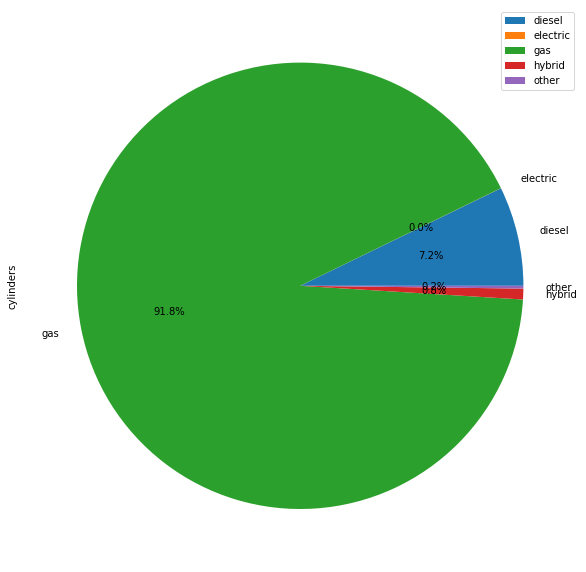

In [52]:
data.pivot_table(index='fuel', values='cylinders', aggfunc='count').plot(kind='pie', y='cylinders', figsize=(10, 12), autopct='%1.1f%%')
plt.show()

Yes, vehicles operating on gasoline have 92% of the cylinders count. An electric car is less than 1%. In our small google search, we also find that type of vehicle may also affect the number of cylinders per vehicle. So let's check that too.

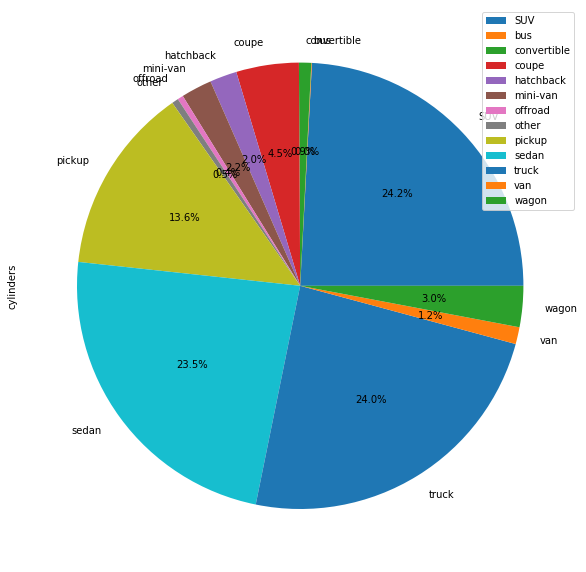

In [53]:
data.pivot_table(index='type', values='cylinders', aggfunc='count').plot(kind='pie', y='cylinders', figsize=(10, 12), autopct='%1.1f%%')
plt.show()

Yes, SUVs, sedans, trucks, and pickup vehicles account for most of the cylinder count in our data. So let's fill the missing values with the median cylinders by the fuel and type.

In [54]:
data['cylinders']= data['cylinders'].fillna(data.groupby(['fuel', 'type'])['cylinders'].transform('median'))

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
data.stb.missing()

,missing,total,percent
cylinders,1,49956,0.002002
price,0,49956,0.000000
model_year,0,49956,0.000000
model,0,49956,0.000000
condition,0,49956,0.000000
fuel,0,49956,0.000000
odometer,0,49956,0.000000
transmission,0,49956,0.000000
type,0,49956,0.000000
paint_color,0,49956,0.000000


There is still one missing value, though. Wonder if it is electric.

In [56]:
data[data['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2432,7900,2011.0,toyota prius,good,NaN,electric,78466.0,automatic,sedan,other,False,2018-09-13,34


NaN cylinders in electric cars.

In [57]:
data['cylinders'] = data['cylinders'].fillna('0')

warnings.filterwarnings("ignore")

In [58]:
data['cylinders'].value_counts()

8.0     17321
6.0     16884
4.0     14912
10.0      542
5.0       260
3.0        34
12.0        2
0           1
Name: cylinders, dtype: int64

In [59]:
data.stb.missing()

,missing,total,percent
price,0,49956,0.0
model_year,0,49956,0.0
model,0,49956,0.0
condition,0,49956,0.0
cylinders,0,49956,0.0
fuel,0,49956,0.0
odometer,0,49956,0.0
transmission,0,49956,0.0
type,0,49956,0.0
paint_color,0,49956,0.0


There are no missing values.

There are lots of variables that make cause missing values. It can happen by a mistype of the users or the company team; also, some values are unknown.

Let's look at the number of 0's in the data.

In [60]:
for i in data:
    print(i, len(data[data[i]==0]))

price 0
model_year 0
model 0
condition 0
cylinders 0
fuel 0
odometer 185
transmission 0
type 0
paint_color 0
is_4wd 25142
date_posted 0
days_listed 53


The days_listed is okay because 0 means that the car wasn't published.

The odometer is also okay because 0 on the odometer means that the car didn't drive at all, but let's check it.

Let's now look at data type and also double-check some columns.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49956 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         49956 non-null  int64  
 1   model_year    49956 non-null  float64
 2   model         49956 non-null  object 
 3   condition     49956 non-null  object 
 4   cylinders     49956 non-null  object 
 5   fuel          49956 non-null  object 
 6   odometer      49956 non-null  float64
 7   transmission  49956 non-null  object 
 8   type          49956 non-null  object 
 9   paint_color   49956 non-null  object 
 10  is_4wd        49956 non-null  bool   
 11  date_posted   49956 non-null  object 
 12  days_listed   49956 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 5.0+ MB


We can change the Dtype in model_year and odometer to int and date_posted to_datetime; it will help us in future calculations.

In [62]:
data['model_year'] = data['model_year'].astype(np.int64, errors='ignore')

warnings.filterwarnings("ignore")

In [63]:
data['odometer'] = data['odometer'].astype(np.int64, errors='ignore')

warnings.filterwarnings("ignore")

In [64]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

warnings.filterwarnings("ignore")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49956 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         49956 non-null  int64         
 1   model_year    49956 non-null  int64         
 2   model         49956 non-null  object        
 3   condition     49956 non-null  object        
 4   cylinders     49956 non-null  object        
 5   fuel          49956 non-null  object        
 6   odometer      49956 non-null  int64         
 7   transmission  49956 non-null  object        
 8   type          49956 non-null  object        
 9   paint_color   49956 non-null  object        
 10  is_4wd        49956 non-null  bool          
 11  date_posted   49956 non-null  datetime64[ns]
 12  days_listed   49956 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(7)
memory usage: 5.0+ MB


done

## Make calculations and add them to the table

Let's add to the table the following: Day of the week, month, and year the ad was placed.

In [66]:
data['day_posted'] = data['date_posted'].dt.day

In [67]:
data['week_posted'] = data['date_posted'].dt.weekday

In [68]:
data['month_posted'] = data['date_posted'].dt.month

In [69]:
data['year_posted'] = data['date_posted'].dt.year

In [70]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,other,True,2018-06-23,19,23,5,6,2018
1,25500,2014,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,193850,automatic,pickup,other,False,2019-03-22,9,22,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,1,4,2019


let's add to the table The vehicle's age (in years) when the ad was placed

In [71]:
data['Vehicle_age'] = data['year_posted'] - data['model_year'] + 1

warnings.filterwarnings("ignore")

In [72]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,other,True,2018-06-23,19,23,5,6,2018,8
1,25500,2014,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,4,10,2018,5
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,3,2,2019,7
3,1500,2003,ford f-150,fair,8.0,gas,193850,automatic,pickup,other,False,2019-03-22,9,22,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,1,4,2019,3


let's add to the table The vehicle's average mileage per year.

In [73]:
data['avg_mile_per_year'] =data['odometer'] / data['Vehicle_age']

In [74]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age,avg_mile_per_year
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,other,True,2018-06-23,19,23,5,6,2018,8,18125.000000
1,25500,2014,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,4,10,2018,5,17741.000000
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8.0,gas,193850,automatic,pickup,other,False,2019-03-22,9,22,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,1,4,2019,3,26967.666667


In [75]:
data['avg_mile_per_year'] = data['avg_mile_per_year'].round()

In [76]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age,avg_mile_per_year
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,other,True,2018-06-23,19,23,5,6,2018,8,18125.0
1,25500,2014,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,4,10,2018,5,17741.0
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,3,2,2019,7,15714.0
3,1500,2003,ford f-150,fair,8.0,gas,193850,automatic,pickup,other,False,2019-03-22,9,22,4,3,2019,17,11403.0
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,1,4,2019,3,26968.0


Let's create a function that generates condition_id from the condition column.

In [77]:
def condition_id(row):
    condition_id = row['condition']
    if condition_id == 'new':
        return 5
    elif condition_id == 'like new':
        return 4    
    elif condition_id == 'excellent':
        return 3
    elif condition_id == 'good':
        return 2
    elif condition_id == 'fair':
        return 1
    else:
        return 0
    
data['condition_id'] = data.apply(condition_id, axis=1)

In [78]:
data['condition_id'].value_counts()

3    24061
2    19516
4     4583
1     1558
5      134
0      104
Name: condition_id, dtype: int64

In [79]:
data.stb.freq(['condition_id'])

,condition_id,count,percent,cumulative_count,cumulative_percent
0,3,24061,48.164385,24061,48.164385
1,2,19516,39.066378,43577,87.230763
2,4,4583,9.174073,48160,96.404836
3,1,1558,3.118744,49718,99.523581
4,5,134,0.268236,49852,99.791817
5,0,104,0.208183,49956,100.000000


In [80]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age,avg_mile_per_year,condition_id
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,other,True,2018-06-23,19,23,5,6,2018,8,18125.0,2
1,25500,2014,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,4,10,2018,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,3,2,2019,7,15714.0,4
3,1500,2003,ford f-150,fair,8.0,gas,193850,automatic,pickup,other,False,2019-03-22,9,22,4,3,2019,17,11403.0,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,1,4,2019,3,26968.0,3


In [81]:
data.stb.missing()

,missing,total,percent
price,0,49956,0.0
model_year,0,49956,0.0
avg_mile_per_year,0,49956,0.0
Vehicle_age,0,49956,0.0
year_posted,0,49956,0.0
month_posted,0,49956,0.0
week_posted,0,49956,0.0
day_posted,0,49956,0.0
days_listed,0,49956,0.0
date_posted,0,49956,0.0


## Carry out exploratory data analysis

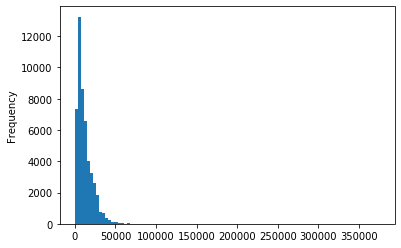

In [82]:
data['price'].plot(kind='hist', bins=100)
plt.show()

It is tough to see what is going on in the price histogram. But we see some outliers close to zero and some highly high outliers to the prices in the data.

In [83]:
data['price'].describe()

count     49956.000000
mean      12138.218893
std       10043.793017
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

With the described method, we can see that prices below 5000 and above 16900 consider being outliers.

In [84]:
good_price = data.query('5000 <= price <= 17000')

In [85]:
good_price.describe()

,price,model_year,odometer,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age,avg_mile_per_year,condition_id
count,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000,25777.000000
mean,10043.033867,2009.813865,118306.798270,39.617062,15.473407,2.999767,6.603251,2018.309190,9.495325,14662.553012,2.690499
std,3465.029724,5.341202,55187.251038,28.529325,8.736988,1.987488,3.475548,0.462169,5.357587,8548.120260,0.639968
min,5000.000000,1908.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,6995.000000,2007.000000,84348.000000,19.000000,8.000000,1.000000,3.000000,2018.000000,6.000000,10136.000000,2.000000
50%,9495.000000,2011.000000,116510.000000,33.000000,15.000000,3.000000,7.000000,2018.000000,9.000000,13484.000000,3.000000
75%,12950.000000,2013.000000,147700.000000,53.000000,23.000000,5.000000,10.000000,2019.000000,12.000000,17632.000000,3.000000
max,17000.000000,2019.000000,920000.000000,271.000000,31.000000,6.000000,12.000000,2019.000000,111.000000,320000.000000,5.000000


Let's put the two histograms of price side by side.

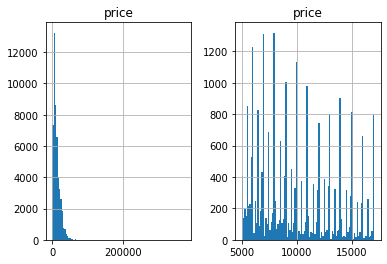

In [86]:
fig, axes = plt.subplots(1, 2)

data.hist('price', bins=100, ax=axes[0])
good_price.hist('price', bins=100, ax=axes[1])
plt.show()

We can see that the data extend on the interval range in the right histogram without the outliers.

lets move on tp date_posted column

We need to change the dates to numeric with the data type column to plot a histogram.

In [87]:
data['date_posted']=data['date_posted'].map(dt.datetime.toordinal)

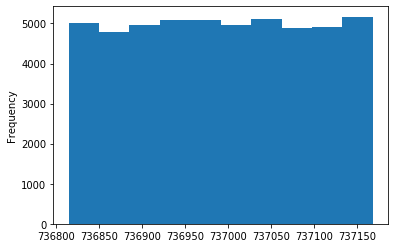

In [88]:
data['date_posted'].plot(kind='hist')
plt.show()

It is tough to understand what is going on. But from what I see, there aren't outliers. Let use the  Describe method.

In [89]:
data['date_posted'].describe()

count     49956.000000
mean     736992.172232
std         101.988458
min      736815.000000
25%      736904.000000
50%      736992.000000
75%      737080.000000
max      737168.000000
Name: date_posted, dtype: float64

there is no outliers in this column

lets move on to odometer column

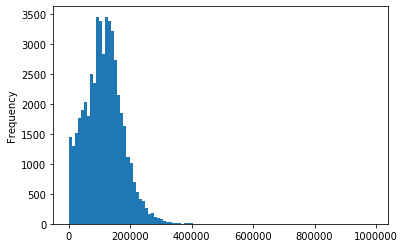

In [90]:
data.odometer.plot(kind='hist', bins=100)
plt.show()

In [91]:
data['odometer'].describe()

count     49956.000000
mean     115181.491272
std       62423.688576
min           0.000000
25%       72764.750000
50%      114587.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64

Hart to see with a histogram but with describing, we get more clarity on the outliers. we can see that odometers below 72764 and above 153000 consider being outliers

In [92]:
good_odometer = data.query('72764 <= odometer <= 153000')

In [93]:
good_odometer.describe()

,price,model_year,odometer,date_posted,days_listed,day_posted,week_posted,month_posted,year_posted,Vehicle_age,avg_mile_per_year,condition_id
count,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000
mean,11351.591868,2009.813209,114267.750774,736991.958112,39.614835,15.477628,2.992543,6.628798,2018.307021,9.493812,14818.935383,2.674336
std,8686.878484,5.035773,22570.787140,101.981237,28.305812,8.737410,1.992256,3.474896,0.461267,5.054283,7631.693604,0.642866
min,1.000000,1962.000000,72767.000000,736815.000000,0.000000,1.000000,0.000000,1.000000,2018.000000,1.000000,1298.000000,0.000000
25%,5900.000000,2007.000000,95562.250000,736904.000000,19.000000,8.000000,1.000000,3.000000,2018.000000,6.000000,10233.500000,2.000000
50%,8995.000000,2011.000000,115000.000000,736992.000000,33.000000,15.000000,3.000000,7.000000,2018.000000,8.000000,13400.000000,3.000000
75%,14995.000000,2013.000000,133663.000000,737080.000000,53.000000,23.000000,5.000000,10.000000,2019.000000,12.000000,17379.750000,3.000000
max,375000.000000,2019.000000,153000.000000,737168.000000,271.000000,31.000000,6.000000,12.000000,2019.000000,58.000000,148459.000000,5.000000


Let's put the two histograms of odometer side by side.

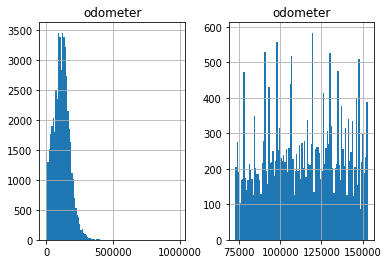

In [94]:
fig, axes = plt.subplots(1, 2)

data.hist('odometer', bins=100, ax=axes[0])
good_odometer.hist('odometer', bins=100, ax=axes[1])

plt.show()

We can see that the data extend on the interval range more equally in the right histogram without the outliers.

Let's move on to the cylinders column.

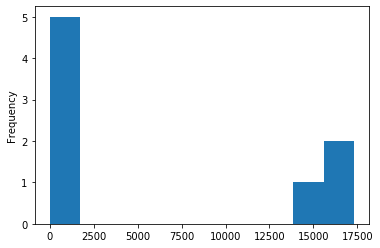

In [95]:
data.cylinders.value_counts().plot(kind='hist')
plt.show()

A pie chart is a more visual way to see outliers here.

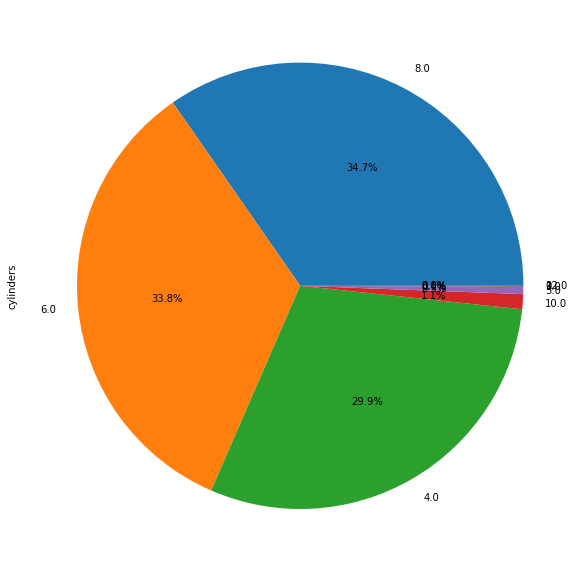

In [96]:
data.cylinders.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%')

plt.show()

In [97]:
data['cylinders'].describe()

count     49956.0
unique        8.0
top           8.0
freq      17321.0
Name: cylinders, dtype: float64

In [98]:
data.cylinders.value_counts()

8.0     17321
6.0     16884
4.0     14912
10.0      542
5.0       260
3.0        34
12.0        2
0           1
Name: cylinders, dtype: int64

Hard to see with a histogram or with the described method. But with a pie chart, it is accessible to deter outliers. we can see that 10, 5, 3, 12, 0 consider being outliers.

Let's slice the data correctly.

In [99]:
good_cylinders = data.query('cylinders == (4, 6, 8)')

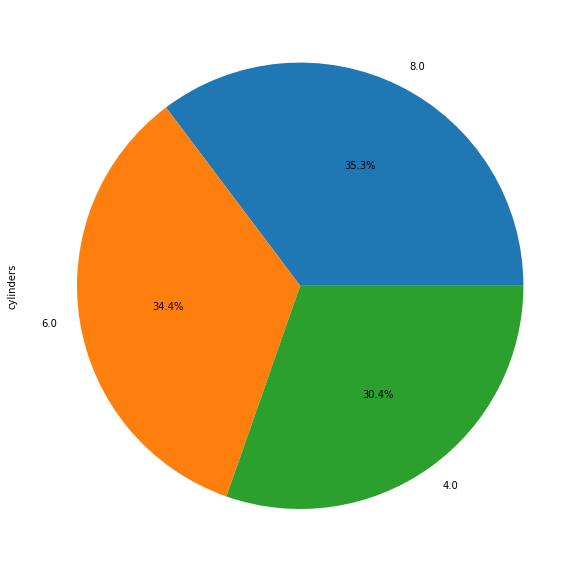

In [100]:
good_cylinders.cylinders.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%')

But to show the data distribution of the good_cylinders and the cylinders column, we need to change them to numeric values.

In [101]:
good_cylinders["cylinders"] = pd.to_numeric(good_cylinders["cylinders"])

In [102]:
data["cylinders"] = pd.to_numeric(data["cylinders"])

Let's put the two histograms of cylinders side by side.

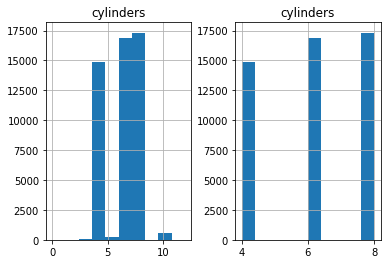

In [103]:
fig, axes = plt.subplots(1, 2)

data.hist('cylinders', ax=axes[0])
good_cylinders.hist('cylinders', ax=axes[1])

plt.show()

We can see that the frequency of the data extends on the interval range without the outliers.

Let's move on to the condition column.

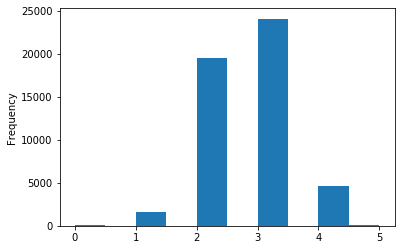

In [104]:
data.condition_id.plot(kind='hist')
plt.show()

In [105]:
data['condition_id'].describe()

count    49956.000000
mean         2.637821
std          0.710955
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64

A pie chart is a more visual way to see outliers here.

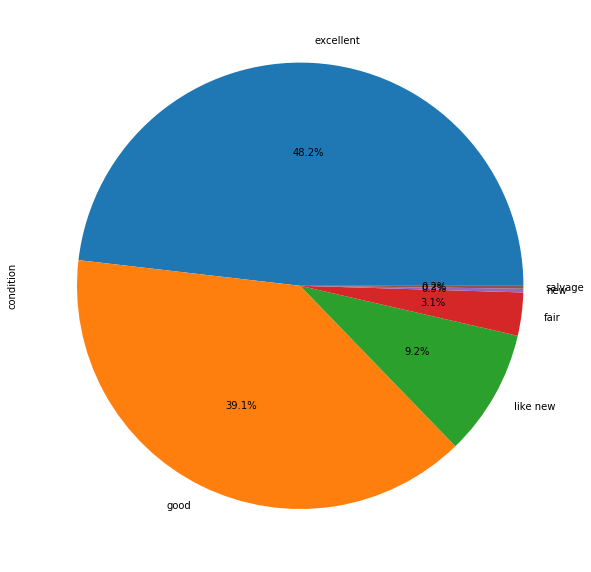

In [106]:
data.condition.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%')
plt.show()

Hard to see with a histogram or with the described method. But with a pie chart, it is accessible to deter outliers in the condition column. we can see that 'salvage', 'new' and 'fair' consider being outliers.

In [107]:
data['condition'].value_counts()

excellent    24061
good         19516
like new      4583
fair          1558
new            134
salvage        104
Name: condition, dtype: int64

In [108]:
data.stb.freq(['condition'])

,condition,count,percent,cumulative_count,cumulative_percent
0,excellent,24061,48.164385,24061,48.164385
1,good,19516,39.066378,43577,87.230763
2,like new,4583,9.174073,48160,96.404836
3,fair,1558,3.118744,49718,99.523581
4,new,134,0.268236,49852,99.791817
5,salvage,104,0.208183,49956,100.000000


In [109]:
good_condition = data.query('condition == ("like new", "good", "excellent")')

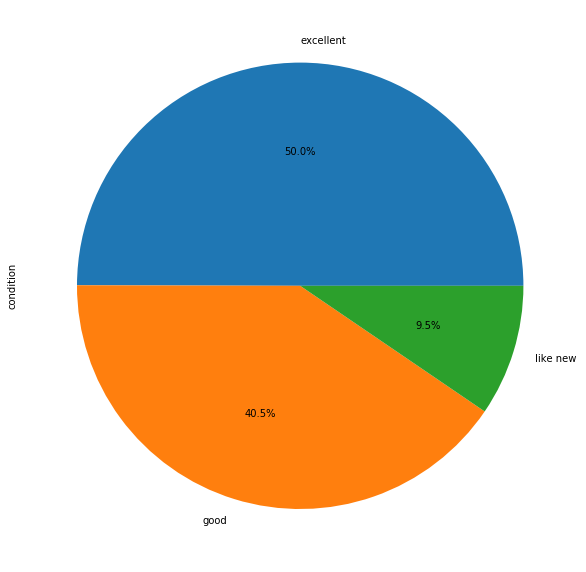

In [110]:
good_condition.condition.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%')
plt.show()

In [111]:
good_condition.stb.freq(['condition'])

,condition,count,percent,cumulative_count,cumulative_percent
0,excellent,24061,49.960548,24061,49.960548
1,good,19516,40.523256,43577,90.483804
2,like new,4583,9.516196,48160,100.000000


We didn't remove like new because it more than 5% of that column.

In [112]:
data['condition_id'].value_counts()

3    24061
2    19516
4     4583
1     1558
5      134
0      104
Name: condition_id, dtype: int64

In [113]:
good_condition_id = data.query('condition_id == (3, 2, 4)')

Let's put the two histograms of condition_id side by side.

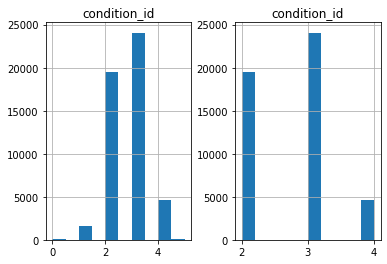

In [114]:
fig, axes = plt.subplots(1, 2)

data.hist('condition_id', ax=axes[0])
good_condition_id.hist('condition_id', ax=axes[1])

plt.show()

no outliers.

Let's move on to the days_listed column.

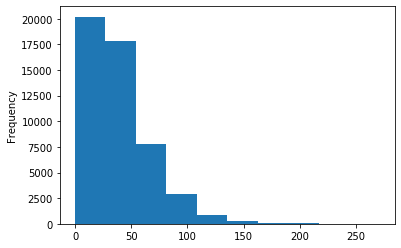

In [115]:
data.days_listed.plot(kind='hist')

In [116]:
data['days_listed'].describe()

count    49956.000000
mean        39.517636
std         28.179544
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

I would say that the outliers here are from 15 days and less and also 55 days and more.

The median is 33, and the mean is 39.5, as we can see in the describe() method.

The ideal time spent per ad is 33 because the median is more efficient than the mean. However, the average can affect insufficient and high numbers; we use the median.

An ad that was removed quickly is displayed for less than 15 days.

An ad that was listed for an abnormally long time is listed for more than 55 days.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49956 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              49956 non-null  int64  
 1   model_year         49956 non-null  int64  
 2   model              49956 non-null  object 
 3   condition          49956 non-null  object 
 4   cylinders          49956 non-null  float64
 5   fuel               49956 non-null  object 
 6   odometer           49956 non-null  int64  
 7   transmission       49956 non-null  object 
 8   type               49956 non-null  object 
 9   paint_color        49956 non-null  object 
 10  is_4wd             49956 non-null  bool   
 11  date_posted        49956 non-null  int64  
 12  days_listed        49956 non-null  int64  
 13  day_posted         49956 non-null  int64  
 14  week_posted        49956 non-null  int64  
 15  month_posted       49956 non-null  int64  
 16  year_posted        499

In [118]:
data.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,SUV,12015,24.051165,12015,24.051165
1,truck,11995,24.011130,24010,48.062295
2,sedan,11771,23.562735,35781,71.625030
3,pickup,6785,13.581952,42566,85.206982
4,coupe,2247,4.497958,44813,89.704940
5,wagon,1491,2.984626,46304,92.689567
6,mini-van,1123,2.247978,47427,94.937545
7,hatchback,1008,2.017776,48435,96.955321
8,van,610,1.221075,49045,98.176395
9,convertible,433,0.866763,49478,99.043158


Let's slice the type column.

In [119]:
good_type = good_price.query('type == ("SUV", "truck")')

Create a pivot table for price per type.

In [120]:
good_type.pivot_table(index='type', values='price', aggfunc=['mean','count'])

,mean,count
,price,price
type,,
SUV,10129.028179,6849
truck,11225.266569,5447


Plot a scatter chart.

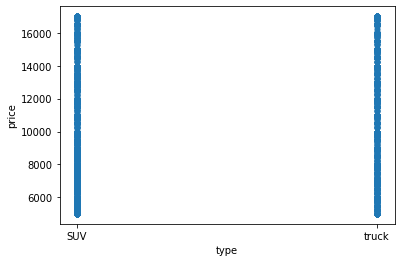

In [121]:
good_type.plot.scatter('type', 'price')
plt.show()

Let's look at the odometer.

In [122]:
good_odometer.pivot_table(index='odometer', values='price', aggfunc='mean')

,price
odometer,
72767,3800.000000
72783,2200.000000
72796,38900.000000
72800,7988.000000
72803,13900.000000
...,...
152957,5995.000000
152977,3999.000000
152988,5950.000000


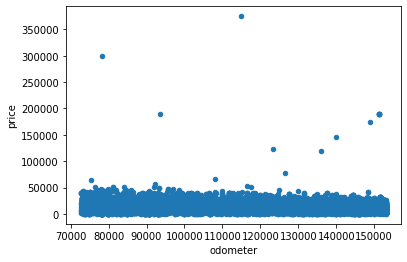

In [123]:
good_odometer.plot.scatter('odometer', 'price')
plt.show()

Odometer dont affect much on price.

Let's look at the condition_id.

In [124]:
good_condition_id.pivot_table(index='condition_id', values='price', aggfunc='mean')

,price
condition_id,
2,10908.643113
3,12803.189643
4,16622.997818


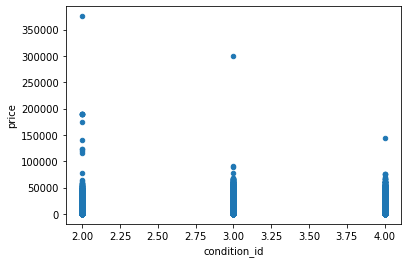

In [125]:
good_condition_id.plot.scatter('condition_id', 'price')
plt.show()

The "good" condition affects the price a lot.

Let's look at the model_year column.

In [126]:
good_price.pivot_table(index='model_year', values='price', aggfunc='mean')

,price
model_year,
1908,12995.000000
1936,5000.000000
1954,15000.000000
1961,5500.000000
1964,9400.000000
1965,11759.000000
1966,10112.500000
1967,16000.000000
1968,8450.000000


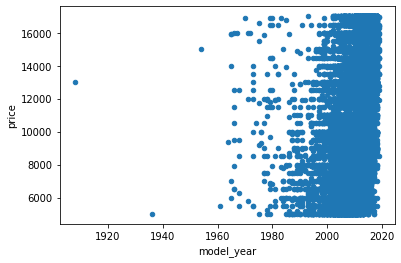

In [127]:
good_price.plot.scatter('model_year', 'price')
plt.show()

Most of the models in the data are in 2000 and above, but we can see that the model affects the price a lot.

Let's look at the paint_color column.

In [128]:
color_price = good_price.pivot_table(index='paint_color', values='price', aggfunc='mean')

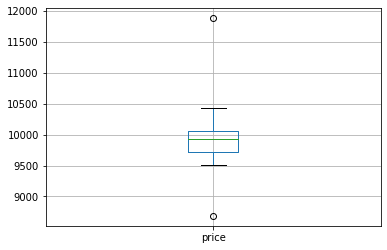

In [129]:
color_price.boxplot('price')
plt.show()

Color does not affect the price a lot, as we can see, because the box between Q1 and Q3 is tiny.

Let's look at the transmission column.

In [130]:
transmission_price = good_price.pivot_table(index='transmission', values='price', aggfunc='mean')

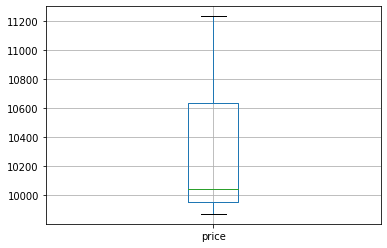

In [131]:
transmission_price.boxplot('price')
plt.show()

We can see that the transmission affects the price Q3 of the transmission column is very big.

let's look with a pie chart at the most common transmission type

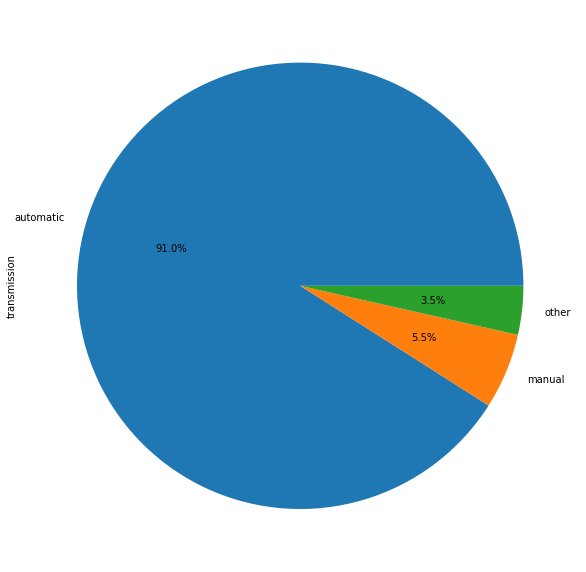

In [132]:
data.transmission.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%')
plt.show()

automatic transmission cars account for 91% of the ads.

The things that most affect the price are the model year and the transmission type.

Let's create a table heatmap to check the correlation between different columns in the data.

In [133]:
data.transmission.value_counts()

automatic    45454
manual        2739
other         1763
Name: transmission, dtype: int64

In [134]:
def transmission_id(row):
    transmission_id = row['condition']
    if transmission_id == 'automatic':
        return 3
    elif transmission_id== 'manual':
        return 2    
    elif transmission_id == 'other':
        return 1
    else:
        return 0
    
data['transmission_id'] = data.apply(condition_id, axis=1)

In [135]:
heatmap = data.pivot_table(index='avg_mile_per_year', values=['transmission_id', 'model_year', 'condition_id', 'price'], aggfunc='median')

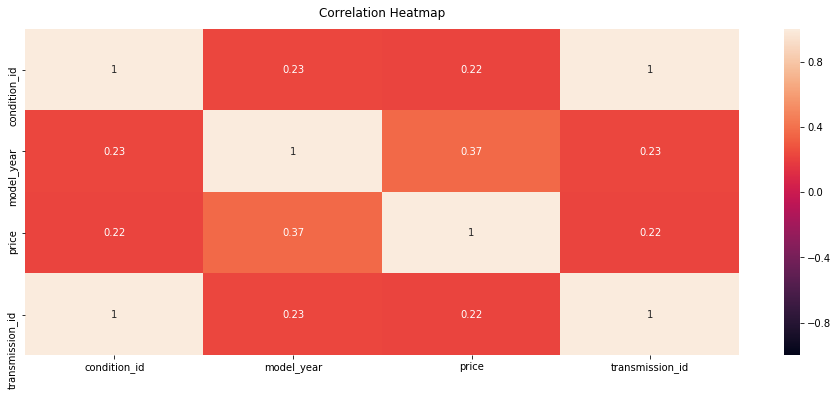

In [136]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(heatmap.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Overall conclusion

We came a long way with our data, and we gathered essential insights for the company.

- first, we look at the data to get familiar with it.

- We preprocess the data and, in this stage, We use our common logic and find relationships between the odometer, model_year, and condition column. Then, we use "groupby", "fillina", and the transform method to fill the missing values. We did a mini-research on google that found a relationship between the engine type (fuel column), the transmission, and the cylinders column. Then once again, we use "groupby", "fillina", and the "transform" method to fill the missing values. With the color_type column, we create one more category called "others." After reducing the missing values to a minimum below 5%, we deleted the remaining missing values.

- We change the data type for calculation preparation on "model_year", "odometer", and "date_posted" columns.

- We removed outliers and visually saw the data with histograms and pie charts. The described method also helped a lot. Then we sliced outliers and created cleaner data.

- Then we looked at the day listed column and determined the ideal time for an ad to be listed.

- After that, we looked at different columns and their effect on the price.

after lots of cleaning and analyzing we filtered the most crucial insight below:

- the ideal time to list an ad is between 20 to 50 days. So future testing of new ads should be in that range of time.

- The price of a car affects the most by the model_year, transmission, and condition_id number 2 (good condition). So to squeeze more revenue from the future ad, the company should focus on listed ads with good condition, model year above 2000. The company should list more automatic cars because they account for 91% of the data.

